<a href="https://colab.research.google.com/github/Farhansyah15/PraktikumML156-22/blob/main/Processing_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# masuk ke directory penyimpanan dataset anda
%cd /content/drive/MyDrive/Machine Learning

/content/drive/MyDrive/Machine Learning


In [ ]:
!ls

data-master  xtest64.npy   xval64.npy	ytrain64.npy
split_data   xtrain64.npy  ytest64.npy	yval64.npy


In [ ]:
!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# split dataset
data_dir = '/content/drive/MyDrive/Machine Learning/data-master'
output = '/content/drive/MyDrive/Machine Learning/split_data'
splitfolders.ratio(data_dir, output=output, seed=1337, ratio=(.7, 0.1, 0.2))

Copying files: 12506 files [05:10, 40.27 files/s] 


In [ ]:
import os

# create train, val, test paths
base_dir = '/content/drive/MyDrive/Machine Learning/split_data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
import cv2
import numpy as np

# gather train dataset
trainX = []
trainY = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            trainX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            trainY.append(label)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [ ]:
# gather validation data
valX = []
valY = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            valX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valY.append(label)

valX = np.array(valX)
valY = np.array(valY)

In [ ]:
# gather test data
testX = []
testY = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            testX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            testY.append(label)

testX = np.array(testX)
testY = np.array(testY)

In [ ]:
#Tampilkan shape
print("Train Data = ", trainX.shape)
print("Train Label = ", trainY.shape)
print("Validation Data = ", valX.shape)
print("Validation Label = ", valY.shape)

Train Data =  (8752, 150, 150, 3)
Train Label =  (8752,)
Validation Data =  (1249, 150, 150, 3)
Validation Label =  (1249,)


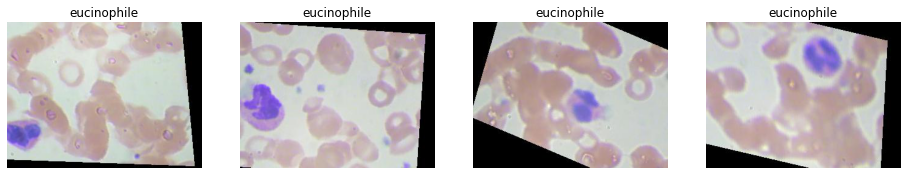

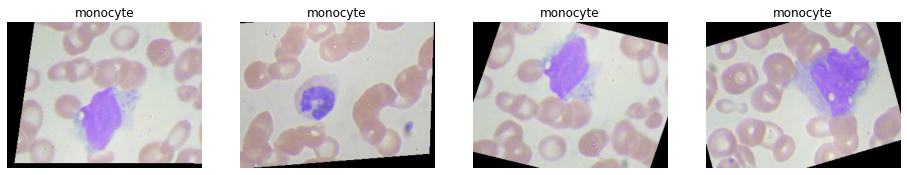

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

file_train_eosinophil=os.path.join("/content/drive/MyDrive/Machine Learning/split_data/train/EOSINOPHIL")
file_train_monocyte=os.path.join("/content/drive/MyDrive/Machine Learning/split_data/train/MONOCYTE")

eosinophil_image = os.listdir(file_train_eosinophil)
monocyte_image = os.listdir(file_train_monocyte)

fname1 = [os.path.join(file_train_eosinophil,fname)
        for fname in eosinophil_image[:4]]

fname2 = [os.path.join(file_train_monocyte,fname)
        for fname in monocyte_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('eucinophile')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('monocyte')
    plt.imshow(img)
    
plt.show()

In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", trainY[:50])

lb = LabelEncoder()
y_train = lb.fit_transform(trainY)
y_val = lb.fit_transform(valY)

print("Label setelah di-encoder ", y_train[:50])

Label sebelum di-encoder  ['LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#pengecekan nilai minimum dan maksimum pada datasets sebelum normalisasi
print('Train min=%.f, max=%.f' % (trainX.min(), trainX.max()))
print('Validation min=%.f, max=%.f' % (valX.min(), valX.max()))

Train min=0, max=255
Validation min=0, max=255


In [ ]:
#normalisasi menggunakan ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_norm = datagen.flow(trainX, y_train, batch_size=64)
val_norm = datagen.flow(valX, y_val, batch_size=64)

In [ ]:
#pengecekan nilai minimum dan maksimum pada datasets setelah normalisasi
batch_trainX, batch_trainy = train_norm.next()
batch_valX, batch_valy = val_norm.next()

print(f'Train min={batch_trainX.min()}, max={batch_trainX.max()}')
print(f'Validation min={batch_valX.min()}, max={batch_valX.max()}')

Train min=0.0, max=0.9982014298439026
Validation min=0.0, max=0.9984585642814636


In [ ]:
input_shape = (150, 150)

train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

validation_generator = datagen.flow_from_directory(validation_dir,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

test_generator = datagen.flow_from_directory(test_dir,
                                              target_size=input_shape,
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

Found 8752 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.
Found 2505 images belonging to 4 classes.


In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import cv2
import numpy as np
from keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dropout, SpatialDropout2D, BatchNormalization

In [ ]:
# build a simple model
model = Sequential()
model.add(InputLayer(input_shape=[150, 150, 3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(Flatten())

# fully connected
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 spatial_dropout2d (SpatialD  (None, 150, 150, 32)     0         
 ropout2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                        

In [ ]:
# compile model
from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# training & saving history of every epoch
H = model.fit(train_generator, 
              batch_size=64, 
              epochs=100, 
              validation_data = validation_generator
              )

Epoch 1/100
274/274 [==============================] - 41s 115ms/step - loss: 1.2159 - acc: 0.7386 - val_loss: 0.5704 - val_acc: 0.7500
Epoch 2/100
274/274 [==============================] - 30s 111ms/step - loss: 0.5748 - acc: 0.7499 - val_loss: 0.5634 - val_acc: 0.7500
Epoch 3/100
274/274 [==============================] - 31s 113ms/step - loss: 0.5695 - acc: 0.7499 - val_loss: 0.5625 - val_acc: 0.7500
Epoch 4/100
274/274 [==============================] - 30s 111ms/step - loss: 0.5671 - acc: 0.7500 - val_loss: 0.5624 - val_acc: 0.7500
Epoch 5/100
274/274 [==============================] - 30s 110ms/step - loss: 0.5659 - acc: 0.7498 - val_loss: 0.5631 - val_acc: 0.7500
Epoch 6/100
274/274 [==============================] - 30s 111ms/step - loss: 0.5646 - acc: 0.7500 - val_loss: 0.5623 - val_acc: 0.7500
Epoch 7/100
274/274 [==============================] - 30s 109ms/step - loss: 0.5637 - acc: 0.7499 - val_loss: 0.5623 - val_acc: 0.7500
Epoch 8/100
274/274 [===========================

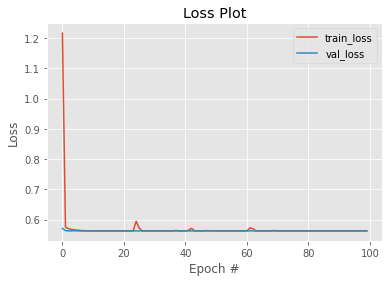

In [ ]:
# plotting loss
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

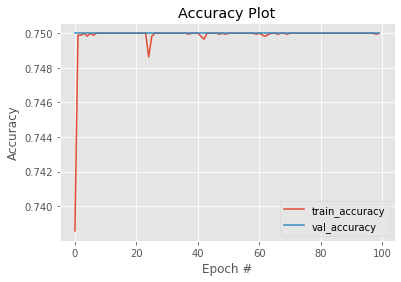

In [ ]:
# plotting accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_accuracy")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# build a simple model
model2 = Sequential()
model2.add(InputLayer(input_shape=[150, 150, 3]))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(SpatialDropout2D(rate=0.1))
model2.add(MaxPool2D(pool_size=2, padding='same'))

model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(SpatialDropout2D(rate=0.15))
model2.add(MaxPool2D(pool_size=2, padding='same'))

model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(SpatialDropout2D(rate=0.2))
model2.add(Flatten())

# fully connected
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())

model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 spatial_dropout2d_13 (Spati  (None, 150, 150, 32)     0         
 alDropout2D)                                                    
                                                                 
 batch_normalization_70 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 75, 75, 64)        18496     
                                                     

In [ ]:
# compile model
from keras.optimizers import Adam

model2.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
# training & saving history of every epoch
H = model2.fit(train_generator, 
              batch_size=32, 
              epochs=100, 
              validation_data = validation_generator
              )

Epoch 1/100
274/274 [==============================] - 79s 285ms/step - loss: 0.6130 - acc: 0.7110 - val_loss: 0.5627 - val_acc: 0.7500
Epoch 2/100
274/274 [==============================] - 75s 275ms/step - loss: 0.5702 - acc: 0.7490 - val_loss: 0.5623 - val_acc: 0.7500
Epoch 3/100
274/274 [==============================] - 74s 270ms/step - loss: 0.5646 - acc: 0.7500 - val_loss: 0.5623 - val_acc: 0.7500
Epoch 4/100
274/274 [==============================] - 76s 278ms/step - loss: 0.5633 - acc: 0.7500 - val_loss: 0.5623 - val_acc: 0.7500
Epoch 5/100
274/274 [==============================] - 74s 271ms/step - loss: 0.5630 - acc: 0.7500 - val_loss: 0.5623 - val_acc: 0.7500
Epoch 6/100
274/274 [==============================] - 75s 272ms/step - loss: 0.5629 - acc: 0.7500 - val_loss: 0.5623 - val_acc: 0.7500
Epoch 7/100
274/274 [==============================] - 73s 268ms/step - loss: 0.5629 - acc: 0.7500 - val_loss: 0.5623 - val_acc: 0.7500
Epoch 8/100
274/274 [===========================

In [ ]:
np.save("xtrain64", trainX)
np.save("xval64",valX)
np.save("xtest64",testX)
np.save('ytrain64', y_train)
np.save('yval64', y_val)
np.save('ytest64',testY)

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Machine Learning/xtrain64.npy')
files.download('/content/drive/MyDrive/Machine Learning/xval64.npy')
files.download('/content/drive/MyDrive/Machine Learning/ytrain64.npy')
files.download('/content/drive/MyDrive/Machine Learning/yval64.npy')
files.download('/content/drive/MyDrive/Machine Learning/xtest64.npy')
files.download('/content/drive/MyDrive/Machine Learning/ytest64.npy')